# Principal Component Analysis (PCA)

Curse of dimensionality: 
- less interpretability
- higher complexity

PCA is a linear dimensionality reduction technique that transforms the p number of input variables into a smaller k (k << p) number of uncorrelated variables called principal components by taking advantage of the existing correlations between the input variables in the dataset. 

The features are selected on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal component. The feature that is responsible for second highest variance is considered the second principal component, and so on.

## Advantages of PCA

There are two main advantages of dimensionality reduction with PCA.

- The training time of the algorithms reduces significantly with less number of features.

- It is not always possible to analyze data in high dimensions. For instance if there are 100 features in a dataset. Total number of scatter plots required to visualize the data would be 100*(100-1)/2 = 4950. Practically it is not possible to analyze data this way.

Visualizing clusters in 1 dimension is a piece of cake.

<img src="pic/1_Bqv9YsGjdv0EOxo3kiZtAg.webp">

Finding clusters in 2 dimensions is easy

<img src="pic/1_pxMtCcZmlzrY-0fLE0p7vg.webp">

Seeing clusters in 3 dimensions…. We can either edit node size or opacity to distinguish the 3rd dimension.

<img src="pic/1_lbrxDqvuAReH7ZwW2KsErg.webp">

PCA projects higher dimensional data into a lower dimension by combining correlated features into new features.

1. Plot data

Let’s assume our data looks like below. On the left, are features x, y and z. On the right, those points are plotted.

<img src="pic/1_MJlSXELJ6-zNJibG5CtqIg.webp">

2. Find the centre of the data

This is the mean of each feature: x, y and z.

<img src="pic/1_1BiMkGksH0JBOEOlf1tBTg.webp">

3. Shift the data points so the centre is now at (0,0)

<img src="pic/1_m3gnAUA9dBFQlbgWAziu3A.webp">

4. Find the line of best fit

The line of best fit is called PC1 (principal component 1).

<img src="pic/1_OjfIsQ5mxzfWoh3wtoBDBA.webp">

PC1 maximizes the sum of squared distances from where points meet the line of best fit at a right angle.

PC1 is a linear combination of x,y and z, meaning it contains parts of each x, y and z.

5. Find PC2

PC2 is the best fitting line perpendicular (intersecting at a right angle) to PC1.

<img src="pic/1_oRj5G874ukOev-uLrsq7LQ.webp">

PC2 is also a linear combination of each x,y and z.

PC1 and PC2 now both explain some of the variance in our features.

6. Rotate the chart so PC1 is the x-axis and PC2 is the y-axis

Post-rotation, our data is now in just 2 dimensions! And clusters are easy to spot.

<img src="pic/1_juLo2GtiuLdHhJOaNljyqw.webp">

## How Does PCA Work?

The objective of PCA is to find the principal components that represents the data variance in a lower dimension and we are going to unfold the process into following steps:

1. represent the data variance using <b>covariance matrix</b>

2. <b>eigenvector and eigenvalue </b>capture data variance in a lower dimensionality

3. <b>principal components</b> are the eigenvectors of the covariance matrix

### Convariance Matrix

<b>Covariance matrix represents the pairwise correlations among a group of variables in a matrix form.</b> Covariance measures the magnitude of how one random variable varies with another random variable.

Multiplying any vector with the covariance matrix will transform it towards the direction that captures the trend of variance in the original dataset.

Let us use a simple example to simulate the effect of this transformation. Firstly, we randomly generate the variable x0, x1 and then compute the covariance matrix.

In [6]:
# generate random variables x0 and x1
import random
import numpy as np

random.seed(0)

x0 = [round(random.uniform(-1, 1),2) for i in range(0,100)]
x1 = [round(2 * i + random.uniform(-1, 1) ,2) for i in x0]

# compute covariance matrix
X = np.stack((x0, x1), axis=0)
covariance_matrix = np.cov(X)
print('covariance matrix\n', covariance_matrix)

covariance matrix
 [[0.28326274 0.5588489 ]
 [0.5588489  1.42892092]]


We then transform some random vectors by taking the dot product between each of them and the covariance matrix.

(-2.5, 2.5)

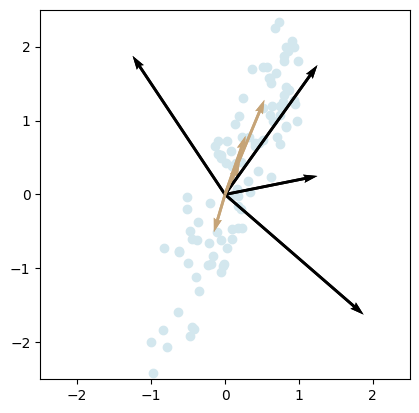

In [7]:
import matplotlib.pyplot as plt

# plot original data points
plt.scatter(x0, x1, color=['#D3E7EE'])

# vectors before transformation
v_original = [np.array([[1,0.2]]), np.array([[-1,1.5]]), np.array([[1.5,-1.3]]), np.array([[1,1.4]])]

# vectors after transformation
for v in v_original:
    v_transformed = v.dot(covariance_matrix)
    origin = np.array([[0, 0], [0, 0]])
    plt.quiver(*origin, v[:, 0], v[:, 1], color=['black'], scale=4)
    plt.quiver(*origin, v_transformed[:, 0], v_transformed[:, 1] , color=['#C6A477'], scale=10)

# plot formatting
plt.axis('scaled')   
plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5])

### Eigenvalue and Eigenvector

Eigenvector (v) of a matrix (A) remains at the same direction after the matrix transformation, hence Av = λv where λ represents the corresponding eigenvalue. Representing data using eigenvector and eigenvalue reduces the dimensionality while maintaining the data variance as much as possible.

Let’s continue with the example above and use this code snippet to overlay the eigenvector with the greatest eigenvalue (in red color). As you can see, it is aligned with the direction with the greatest data variance.

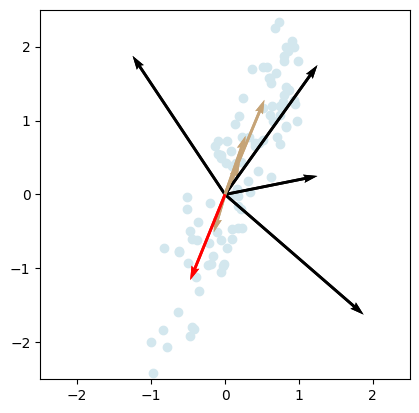

In [9]:
from numpy.linalg import eig

import matplotlib.pyplot as plt

# plot original data points
plt.scatter(x0, x1, color=['#D3E7EE'])

# vectors before transformation
v_original = [np.array([[1,0.2]]), np.array([[-1,1.5]]), np.array([[1.5,-1.3]]), np.array([[1,1.4]])]

# vectors after transformation
for v in v_original:
    v_transformed = v.dot(covariance_matrix)
    origin = np.array([[0, 0], [0, 0]])
    plt.quiver(*origin, v[:, 0], v[:, 1], color=['black'], scale=4)
    plt.quiver(*origin, v_transformed[:, 0], v_transformed[:, 1] , color=['#C6A477'], scale=10)

# plot formatting
plt.axis('scaled')   
plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5])

eigenvalue,eigenvector = eig(covariance_matrix)
plt.quiver(*origin, eigenvector[:,1][0], eigenvector[:,1][1] , color=['red'], scale=4, label='eigenvector')

### Principal Components

Now that we have discussed that covariance matrix can represent the data variance when multiple variables are present and eigenvector can capture the data variance in a lower dimensionality. By computing the eigenvector/eigenvalue of the covariance matrix, we get the principal components. There are more than one eigenvector for a matrix and they are typically arranged in a descending order of the their eigenvalue, denoted by PC1, PC2 …PCn. The first principal component (PC1) is the eigenvector with the highest eigenvalue which is the red vector shown in the image, which explains the maximum variance in the data. Therefore, when using principal components to reduce data dimensionality, we select the ones with higher eigenvalues as it preserves more information in the original dataset.

## PCA Implementation in Machine Learning

### Numeric data

PCA is a statistical technique and can only be applied to numeric data. Therefore, categorical features are required to be converted into numerical features before PCA can be applied.

### Standardize data into the same scale

PCA is sensitive to data with different scales, as covariance matrix requires the data at the same scale to measure the correlation between features with a consistent standard. To achieve that, data standardization is applied before PCA, which means that each feature has a mean of zero and a standard deviation of one. 

## Example with IRIS dataset

### Dataset Loading

In [10]:
import numpy as np
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Preprocessing 

The first preprocessing step is to divide the dataset into a feature set and corresponding labels. The following script performs this task:

In [25]:
X = dataset.drop('Class', axis=1)
Y = dataset['Class']

The next preprocessing step is to divide data into training and test sets. 

In [26]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

As mentioned earlier, PCA performs best with a normalized feature set. We will perform standard scalar normalization to normalize our feature set.

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Applying PCA on the scaled data

PCA depends only upon the feature set and not the label data. Therefore, PCA can be considered as an unsupervised machine learning technique.

Performing PCA using Scikit-Learn is a two-step process:

- Initialize the PCA class by passing the number of components to the constructor.

- Call the fit and then transform methods by passing the feature set to these methods. The transform method returns the specified number of principal components.

In [28]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

We did not specify the number of components in the constructor. Hence, all four of the features in the feature set will be returned for both the training and test sets.

The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components.

In [29]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.72226528 0.23974795 0.03338117 0.0046056 ]


### Visualize explained variance using scree plot

[0.72226528 0.23974795 0.03338117 0.0046056 ]
[0.72226528 0.96201323 0.9953944  1.        ]


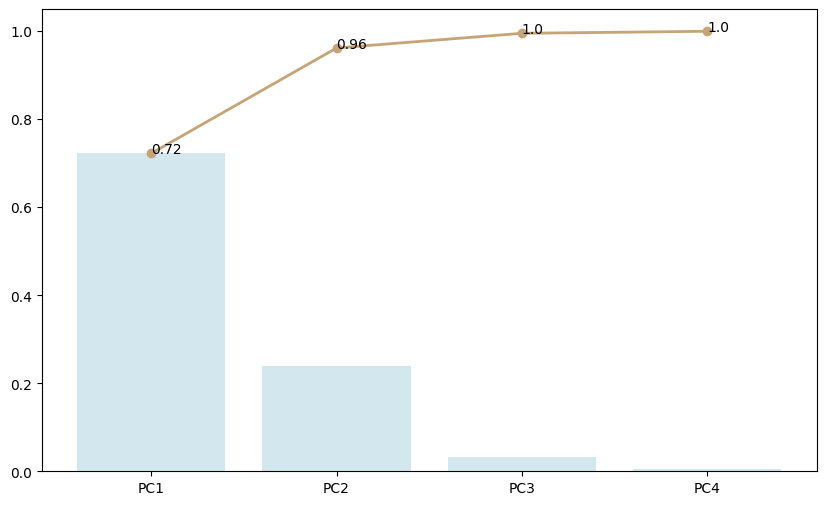

In [30]:
import matplotlib.pyplot as plt

principal_components = ['PC1', 'PC2', 'PC3', 'PC4']
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.bar(principal_components, explained_variance, color='#D3E7EE')
plt.plot(principal_components, cumulative_variance, 'o-', linewidth=2, color='#C6A477')

# add cumulative variance as the annotation
for i,j in zip(principal_components, cumulative_variance):
   plt.annotate(str(round(j,2)), xy=(i, j))

It can be seen that first principal component is responsible for 72.22% variance. Similarly, the second principal component causes 23.9% variance in the dataset. Collectively we can say that (72.22 + 23.9) 96.21% percent of the classification information contained in the feature set is captured by the first two principal components.

Let's first try to use 1 principal component to train our algorithm. 

In [16]:
from sklearn.decomposition import PCA

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

### Training and Making Predictions

In [17]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

### Performance Evaluation

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print("Accuracy: ", accuracy_score(Y_test, Y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  1  5]]
Accuracy:  0.9333333333333333


It can be seen from the output that with only one feature, the random forest algorithm is able to correctly predict 28 out of 30 instances, resulting in 93.3% accuracy.

## PCA with Numpy

### Wine dataset

In [31]:
# Load the Wine dataset
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data
y = wine.target

print("Wine dataset size:", X.shape)

Wine dataset size: (178, 13)


### Standardizing data

In [32]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

### Computing the covariance matrix

PCA is done by performing the eigendecomposition on the covariance matrix of the standardized data.

Note that the transpose is needed since we are interested in getting the covariance matrix of the input variables. Otherwise, you will get the covariance matrix of the observations, which is not needed here. The function returns the covariance matrix in the form of a NumPy array.

In [33]:
import numpy as np
cov_mat = np.cov(X_scaled.T)

It is not easy to read the output of a 13 x 13 matrix. So, we represent the covariance matrix as a Seaborn heatmap.

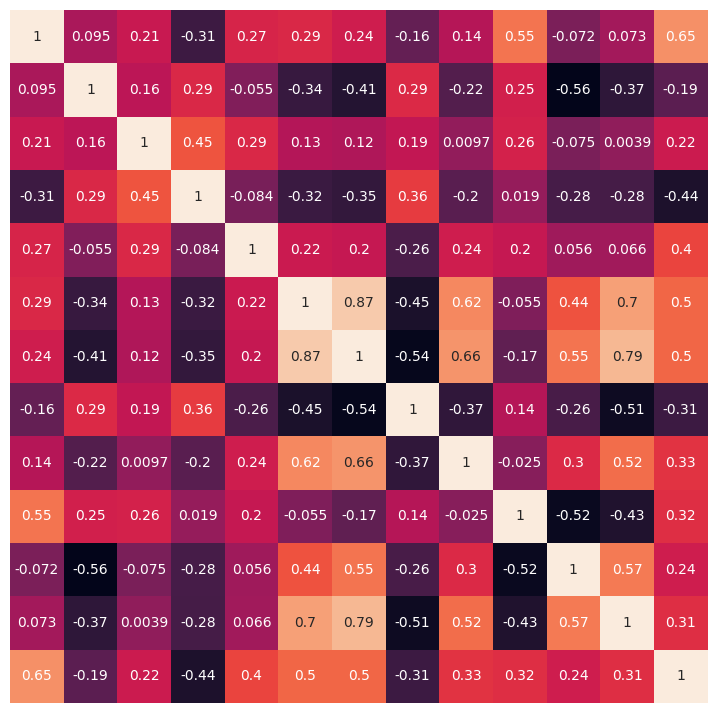

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 9))
sns.heatmap(cov_mat, annot=True, cbar=False,
            xticklabels=False, yticklabels=False)

# plt.savefig("Cov_Heatmap.png")

### Computing the eigenvalues and eigenvectors

PCA is performed by computing the eigenvalues and eigenvectors of the covariance matrix of standardized data.

The process of computing the eigenvalues and eigenvectors of a matrix is called the <b>eigendecomposition</b>. We decompose (break down) the covariance matrix into the product of its eigenvalues and eigenvectors as defined in the following mathematical equation.

$$Ax = \lambda x$$

Here, A is the covariance matrix which is an n x n square matrix. λ is a scalar that denotes an eigenvalue and x is a vector that denotes an eigenvector of the corresponding λ value. The eigenvalues and eigenvectors come in pairs. Such a pair is known as an <b>eigenpair</b>. The covariance matrix can have multiple such eigenpairs.

In [35]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print("Eigenvalues")
print(eigen_vals)
print()
print("Eigenvectors output shape")
print(eigen_vecs.shape)

Eigenvalues
[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.10396199 0.35046627 0.16972374 0.29051203 0.22706428
 0.25232001]

Eigenvectors output shape
(13, 13)


Since the Wine dataset has 13 input features, we get 13 eigenvalues and a 13x13 matrix of eigenvectors. The eigenvectors are represented as columns of the matrix.

- The eigenvalues of the covariance matrix define the magnitude of each principal component.

- The eigenvectors of the covariance matrix represent the directions of maximum variance.

- The amount of variance explained by a principal component can be obtained by getting the ratio (fraction) between the corresponding eigenvalue and the sum of all eigenvalues.

- Principal components are obtained by calculating the matrix product between the standardized data and the eigenvector matrix (eigen_vecs).

### Selecting the best number of principal components

Not all components contribute the same to the PCA model. Only the components with large eigenvalues give the maximum contribution.

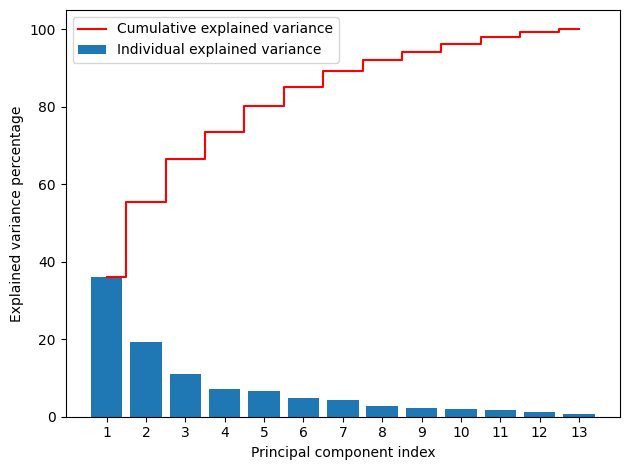

In [36]:
exp_var = []

# Sort the eigenvalues in descending order
eigen_vals = np.sort(eigen_vals)[::-1]

for i in eigen_vals:
  var = (i / np.sum(eigen_vals)) * 100
  exp_var.append(var)

cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1, 14), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(1, 14), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=list(range(1, 14)))
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig("Barplot.png")

### Transforming data

The final step in performing PCA is to transform the data with the selected number of principal components.

Transformation is done by calculating the matrix product between the standardized data and the eigenvector matrix (eigen_vecs)

The following code returns the transformed dataset with seven components as a NumPy array.

In [37]:
transformed_data = np.dot(X_scaled, eigen_vecs)[:, 0:7]
print("Transformed Wine dataset size:", transformed_data.shape)

Transformed Wine dataset size: (178, 7)


There is no change in the number of observations (data points) in the Wine dataset before and after PCA. The original Wine dataset has 13 features and the transformed dataset has only 7 features. So, the dimensionality (the number of features) has been reduced significantly while retaining a 90% variance in the data!